# Plot the Results of the Mouse Brain Dataset

## Packages Loading

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.metrics.cluster import adjusted_rand_score

import sys
sys.path.append(r'../../../../')
from Model.utils import reorder_categories

## Results Loading

In [3]:
slices = ['ATAC', 'H3K4me3', 'H3K27ac', 'H3K27me3']

slice_id = 1    # 1, 2, 3, 4

adata_results = sc.read_h5ad(f'../../../Mouse_Brain_{slices[slice_id-1]}.h5ad')

## Plot the Spatial Domain Identifications

In [109]:
## define the plot parameters
colors_domain = {
    'SpaKnit':      [   '#e07a5f', '#83c5be', '#d3edbe', '#f4a259', '#597b84', '#a38161', '#e6db9e', '#52b69a',
                        '#d5a376', '#ffbb78', '#98df8a', '#f9c74f', '#F19C79'],

    'SpatialGlue':  [   '#e07a5f', '#83c5be', '#e6db9e', '#ffbb78', '#d3edbe', '#f4a259', '#F19C79', '#d5a376',
                        '#a38161', '#597b84', '#52b69a', '#98df8a', '#f9c74f'],

    'MultiVI':      [   '#F19C79', '#83c5be', '#e07a5f', '#a38161', '#597b84', '#f9c74f', '#ffbb78', '#e6db9e',
                        '#d5a376', '#d3edbe', '#98df8a', '#f4a259', '#52b69a'],

    'MultiMAP':     [   '#F19C79', '#83c5be', '#e07a5f', '#a38161', '#597b84', '#f9c74f', '#ffbb78', '#52b69a',
                        '#d5a376', '#98df8a', '#e6db9e', '#f4a259', '#d3edbe'],

    'STAGATE':      [   '#a38161', '#d3edbe', '#f9c74f', '#52b69a', '#597b84', '#98df8a', '#e07a5f', '#83c5be',
                        '#e6db9e', '#F19C79', '#d5a376', '#ffbb78', '#f4a259'],
    
    'SpaGCN':       [   '#d3edbe', '#f4a259', '#e07a5f', '#ffbb78', '#98df8a', '#F19C79', '#e6db9e', '#d5a376',
                        '#83c5be', '#a38161', '#52b69a', '#597b84', '#f9c74f'],  

    'Modality1':    [   '#52b69a', '#e07a5f', '#d3edbe', '#f4a259', '#e6db9e', '#d5a376', '#f9c74f', '#597b84',
                        '#F19C79', '#ffbb78', '#98df8a', '#83c5be', '#a38161'],  

    'Modality2':    [   '#52b69a', '#e07a5f', '#597b84', '#f4a259', '#e6db9e', '#98df8a', '#83c5be', '#d3edbe',
                        '#F19C79', '#a38161', '#d5a376', '#f9c74f', '#ffbb78']
}
font_size = 24

save_path = f'../../Mouse_Brain/{slices[slice_id-1]}/'

result_key = ['SpaKnit', 'SpatialGlue', 'MultiVI', 'MultiMAP', 'STAGATE', 'SpaGCN', 'Modality1', 'Modality2']

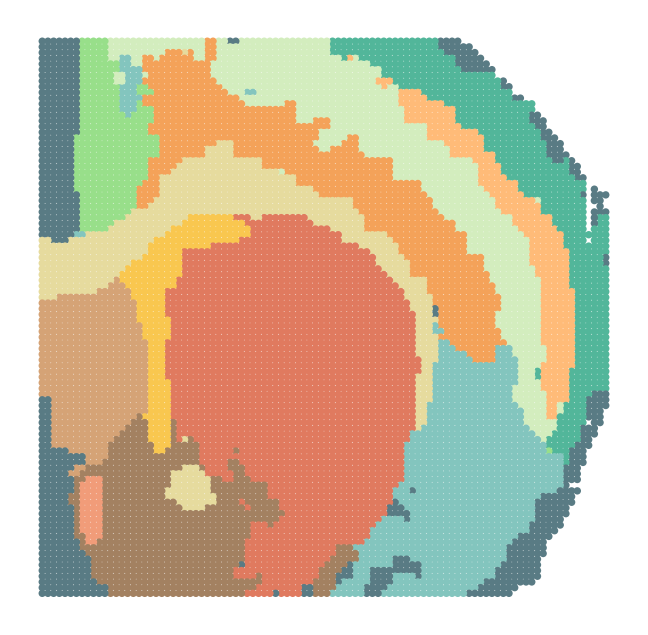

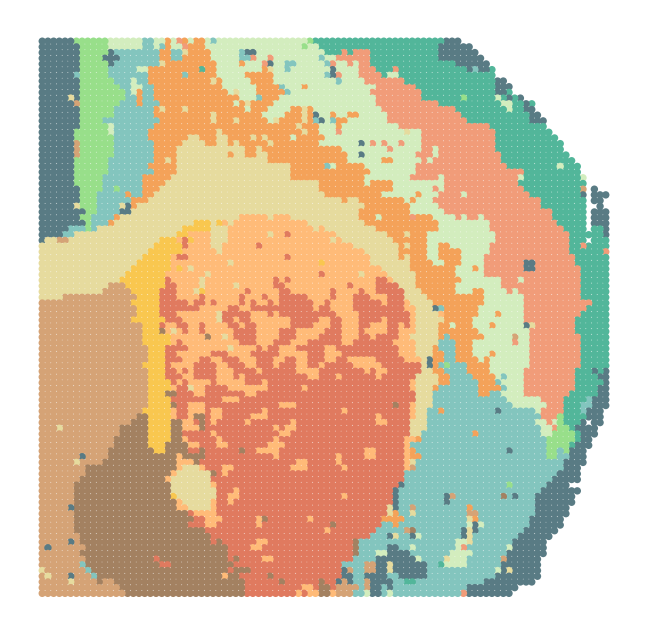

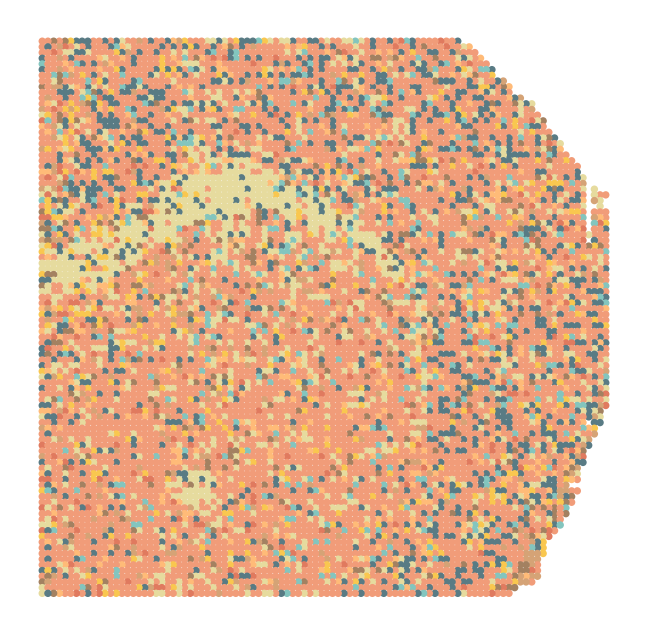

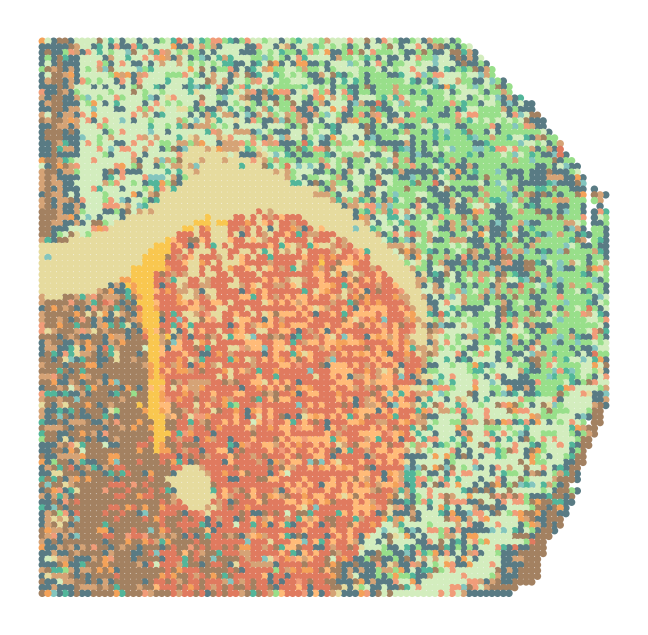

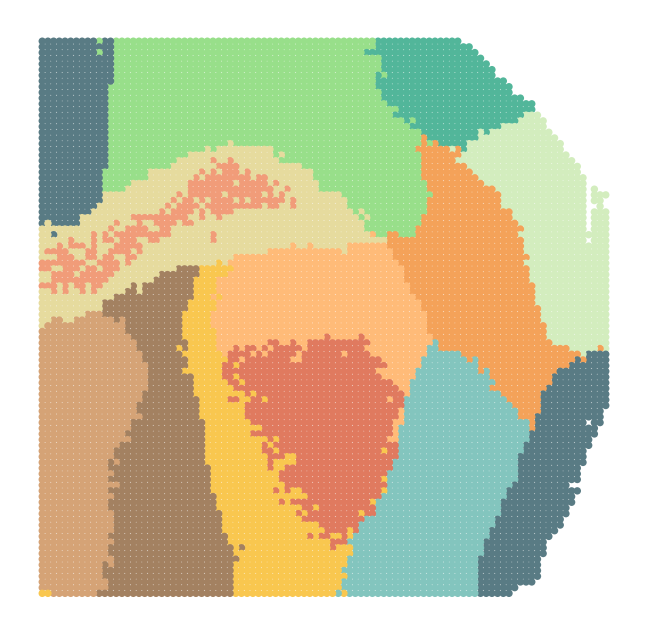

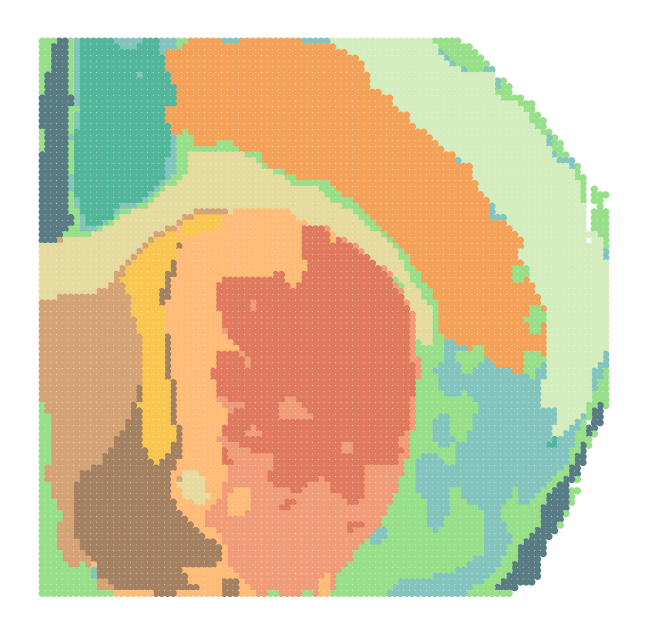

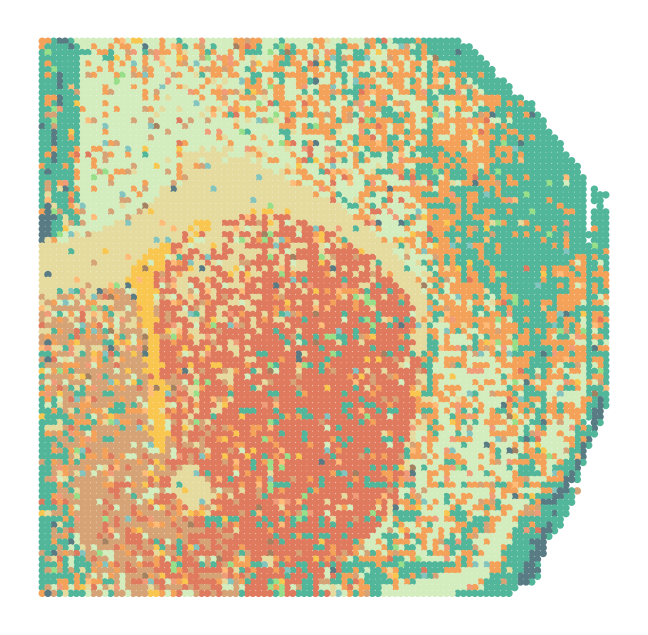

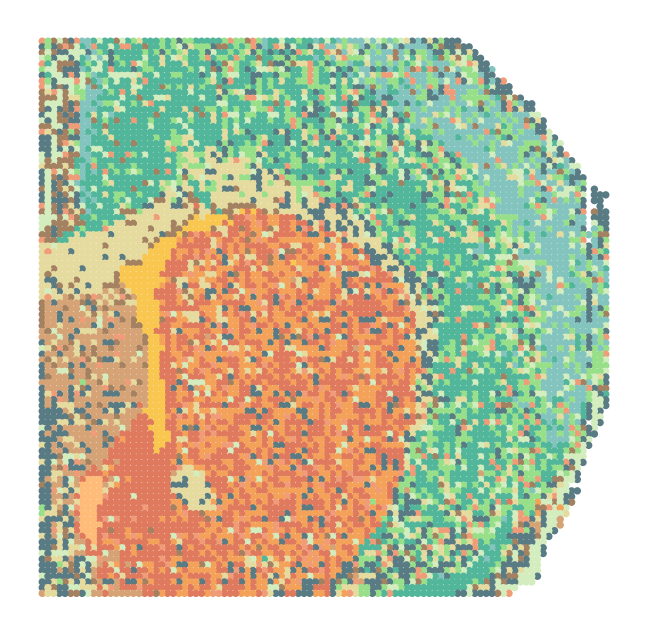

In [110]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = font_size

for result in result_key:
    # new_order = new_order_dict[result]
    # reorder_categories(adata_results, result, new_order)

    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    sc.pl.spatial(adata_results, img_key="hires", color=result, spot_size=1.3, ax=ax, show=False, palette=colors_domain[result])
    ax.invert_yaxis()
    ax.set_title(f"")
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.get_legend().remove()

    # Hide axis borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Adjust subplot parameters
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.tight_layout()

    plt.savefig(f'{result}.png', dpi=500)
    plt.savefig(f'{result}.eps')

    plt.show()